<a href="https://colab.research.google.com/github/adalau05/data-analysis/blob/main/Retail_customers_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Object: To classify customers into segments based on behaviors (Churn probabililty)**

Customer segmentation based on behavior is the process of grouping customers according to how they interact with a product or service. Instead of looking only at who customers are (demographics) or what they say they prefer (attitudinal), behavioral segmentation focuses on what customers actually do.

# **Key Behavioral Dimensions**

These can include:

1. **Purchase Behavior**

*   Frequency of purchases
*   Recency (time since last purchase)
*   Monetary value
*   Product categories purchased
*   Preferred channels (in-store, online)

2. **Engagement Behavior**

*   Website/app usage (visits, clicks, time on site)
*   Response to emails, SMS, or marketing campaign

3. **Loyalty Behaviour**

*   Membership tier
*   Repeat purchases
*   Review/feedback activity
*   Net promoter behavior

4. **Customer Journey Behaviour**

*   Where customers drop off
*   Which touchpoints they use
*   Path-to-purchase patterns

# **Customer segments based on behaviors:**

*   **Bargain Hunters**
*   **One-Time Buyers**
*   **Loyal Regulars**
*   **At-Risk Customers**

# **Actionable Insights for each segments:**

1. **Bargain Hunters**

*   Send targeted promotions and discounts
*   Offer loyalty programs that reward frequency
*   Bundle products/services to increase basket size
*   ⚠️ Watch margins — avoid training them to only buy on discount

2. **One-Time Buyers**

*   Build strong onboarding flows (welcome email, product tips)
*   Send win-back emails after inactivity
*   Ask for first-purchase feedback to identify friction
*   Convert them into repeat customers with small incentives

3. **Loyal Regulars**

*   Give early access to new drops or limited items
*   Offer soft benefits (free shipping thresholds, priority support)  
*   Promote referral programs — they are already advocates

4. **VIPs / High-Value Customers**

*   Provide high-touch, personalized customer service
*   Send exclusive or invite-only offers
*   Use personal communication (SMS, dedicated rep, handwritten notes)
*   Maintain high retention by making them feel valued

5. **At-Risk Customers**

*   Trigger win-back campaigns based on churn signals
*   Offer tailored reactivation discounts or bundles
*   Send surveys to understand what went wrong
*   Provide friction-removal options (pause account, address service issues)











# ⭐ **Why Segment Customers?**

1. **More relevant, personalized marketing**

**Different customers want different things:**

*   Bargain hunters respond to discounts
*   VIPs value exclusivity, not coupons
*   At-risk customers need reactivation messaging

**Segmentation lets you send the right message to the right people, increasing conversion rates.**

2. **Better customer retention**

**Segmentation reveals churn risks:**

*   High recency = likely to churn
*   Low frequency = disengaged
*   Heavy discount users = price-sensitive

**You can apply targeted win-back strategies to reduce revenue loss.**

3. **Higher CLV (customer lifetime value)**

**When customers receive personalized, relevant offers, they:**

*   Buy more often
*   Spend more
*   Stay longer

**Segmentation increases CLV by maximizing each segment’s potential.**

4. **Smarter resource allocation**

**Instead of spending equally across all customers, segmentation helps you:**

*   Invest more in high-value or high-potential customers
*   Reduce wasteful spend on low-value customers
*   Prioritize segments strategically

**You stop treating all customers as if they have equal value when they don’t.**

5. **Better product and experience decisions**

**Each segment has distinct needs:**

*   VIPs want premium experience
*   Bargain hunters want deals
*   One-time buyers need onboarding
*   Loyal regulars want benefits

**Segmentation tells companies where to innovate, improve, or simplify.**

6. **Stronger profitability**

**Some customers buy only during sales, while others pay full price.
By segmenting, you can:**

*   Protect margins
*   Reduce discount abuse
*   Improve promo efficiency

7. **Clearer measurement & insights**

**Segmentation provides a framework for:**

*   Tracking segment movement (e.g., Regular → VIP)
*   Measuring campaign performance by segment
*   Forecasting churn and lifetime value
*   It adds structures to data analytics.



# print first 5 rows of customer data

In [ ]:
#import the customer file
import pandas as pd
import numpy as np
df = pd.read_csv('/content/customer.csv')
display(df.head())

,customer_id,order_count,avg_order_value,total_spend,discount_ratio,recency_days,purchase_frequency,margin_pct,membership,complaints,rfm_score
0,1,5,85.79,428.95,0.096237,342,0.439,0.13,0,0,7
1,2,4,66.90,267.60,0.391311,56,2.143,0.52,0,1,9
2,3,4,8.94,35.76,0.475590,59,2.034,0.37,0,1,8
3,4,5,307.57,1537.85,0.326991,220,0.682,0.53,0,0,11
4,5,5,85.60,428.00,0.302156,185,0.811,0.48,0,0,9


# Let's explain some columns of the dataset

| Field          | Description                                             |
| -------------- | ------------------------------------------------------- |
| **margin_pct** | Estimated profit margin per customer (5%–60%)           |
| **membership** | 1 = subscribed to a loyalty/membership program, 0 = not |
| **complaints** | Number of customer complaints (Poisson-distributed)     |
| **rfm_score**  | Combined Recency + Frequency + Monetary score (3–15)    |


# ✅ **How to Calculate RFM Score**

RFM stands for:

**R – Recency**
How recently a customer made a purchase.

**F – Frequency**
How many purchases (or visits) a customer made.

**M – Monetary**
How much revenue the customer generated.

Each dimension is usually turned into a score from 1–5, based on quintiles (or any other ranking logic).

🔢 **Step-by-Step RFM Calculation**

1. **Recency Score (R)**

Customers with low recency days → more recent → score 5

Customers with high recency days → inactive → score 1

**Example:**
You sort all customers by recency_days (ascending) and split into 5 equal groups.

Recency Days → Recency Score

0–30	→ 5

31–60 →	4

61–120	→ 3

121–240 →	2

240+ → 1

2. **Frequency Score (F)**

Higher order_count → more loyal → score 5

Low order_count → score 1

**Example breakdown:**

Order Count → Frequency Score

12+	→ 5

8–11 → 4

5–7 → 3

2–4	→ 2

1	→ 1

3. **Monetary Score (M)**

**M = order_count × avg_order_value × (1 – discount_ratio)**

🔍 **Why this method?**

Because it accounts for:

✔ how often they buy (volume)

✔ how much they buy (value)

✔ how much discount they use (profitability impact)

This makes the RFM score far more realistic.

**✅ RFM score = 0.5R + 0.3F + 0.2M**

Here’s why:

**Recency (R)** is typically the strongest predictor of churn → so it gets the largest weight.

**Frequency (F)** is the second most important.

**Monetary value (M)** is still important but usually contributes the least to predicting churn behavior.

# **What is Discount ratio?**

**Discount ratio** is a metric that estimates how much a customer relies on discounts when purchasing.

Definition

**Discount Ratio = (Total Discount Amount Used) / (Total Original Value of Purchases)**

**Interpretation**

*   0.00 → 0.10: Rarely uses discounts
*   0.10 → 0.30: Sometimes uses discounts
*   0.30 → 0.60: Frequently uses discounts
*   0.60 → 1.00: Mostly buys only on discount

**Example**

If a customer bought items worth **\$500 at original price but paid \$400** after discounts:

Discount amount = 500 − 400 = 100

**Discount ratio = 100 / 500 = 0.20**

# **What is Churn probability?**

**Churn probability** is a score (usually from 0 to 1) that estimates the likelihood a customer will stop buying, cancel, or become inactive within a given time period.

🔍 **What “churn probability” means**

*   0.00 → 0.20 (Low churn risk):
Customer is engaged, buys frequently, and is unlikely to leave.
*   0.20 → 0.50 (Medium churn risk):
Customer activity is declining; may need re-engagement.
*   0.50 → 0.80 (High churn risk):
Customer behavior shows warning signs (long recency, low purchases).
*   0.80 → 1.00 (Very high churn risk):
Customer is close to lost — win-back actions are needed.

# 🧠 **How churn probability is usually calculated**

Models often use factors such as:

**Behavioral**

*   Recency (days since last purchase)
*   Purchase frequency
*   Order count trend
*   Discount dependence
*   Inactivity duration

**Value-based**

*   Lifetime value
*   Profit margin
*   Price sensitivity

**Engagement**

*   Email open/click activity
*   Website visits
*   App usage patterns
*   Support-related

**Complaints**

*   Refunds/returns
*   Satisfaction indicators

📈 **Example**

If your model predicts that a customer has a 0.71 churn probability:

➡️ 71% chance they will stop buying soon

➡️ They should move into At-Risk or Win-Back workflows.

Churn probability was built using a synthetic scoring model that combines multiple behavioral, financial, and engagement indicators.

Since this was a fictional dataset, I created a weighted formula inspired by common churn-risk models used in CRM and predictive analytics.

# **✅ How the Churn Probability is calculated**

 🔢 **Step 1 — Normalize (scale) each variable**

To combine variables with different units, each was normalized to a 0–1 scale.

This makes every factor comparable on the same scale.

🔍**Step 2 — Transform variables into churn-risk direction**

Some features naturally increase churn risk; others decrease it.
I converted each feature so that:

👉 Higher value = higher churn risk

Here’s how each component was transformed:


| Variable             | Raw meaning                  | Churn meaning                              |
| -------------------- | ---------------------------- | ------------------------------------------ |
| `recency_days`       | Days since last order        | More days → more churn risk                |
| `order_count`        | Total orders                 | Fewer orders → more churn risk             |
| `discount_ratio`     | % of purchases with discount | More discount dependence → more churn risk |
| `complaints`         | Support complaints           | More complaints → more churn risk          |
| `margin_pct`         | Margin %                     | Lower margin → more churn risk             |
| `rfm_score`          | Higher = better              | Converted so low = high churn              |
| `purchase_frequency` | Orders/month                 | Low frequency → high churn                 |
| `membership`         | 1 = member                   | Non-member → higher churn                  |


In [ ]:
def norm(x):
    return (x - x.min()) / (x.max() - x.min() + 1e-9)

In [ ]:
rec = norm(df['recency_days'])
freq = 1 - norm(df['order_count'])
disc = df['discount_ratio']
compl = norm(df['complaints'])
margin = 1 - norm(df['margin_pct'])
rfm = 1 - norm(df['rfm_score'])
pfreq = 1 - norm(df['purchase_frequency'])
member = 1 - df['membership']

🧮 **Step 3 — The Weighted Churn Formula**

Then I combined all signals into a weighted model.

**Why these weights?**

Recency (30%) is the strongest real-life predictor of churn.

Frequency, profitability, and engagement each carry moderate weight.

Membership is a weak but meaningful predictor.

In [ ]:
churn = (
    0.30*rec +        # Biggest driver → How long since they last purchased
    0.15*freq +       # Low order count increases churn
    0.10*disc +       # Discount-dependence
    0.10*compl +      # Complaints
    0.10*margin +     # Lower margin = low-value customer
    0.10*rfm +        # Low RFM score increases churn
    0.10*pfreq +      # Low purchase frequency
    0.05*member       # Non-members more likely to churn
)


🎯 **Step 4 — Final churn probability**

After computing the weighted score:

*   Ensured values stay between 1% and 99%
*   Rounded to 4 decimal places

In [ ]:
churn_probability = np.round(np.clip(churn, 0.01, 0.99), 4)

In [ ]:
df['churn_probability'] = churn_probability
display(df.head())

,customer_id,order_count,avg_order_value,total_spend,discount_ratio,recency_days,purchase_frequency,margin_pct,membership,complaints,rfm_score,churn_probability
0,1,5,85.79,428.95,0.096237,342,0.439,0.13,0,0,7,0.6886
1,2,4,66.90,267.60,0.391311,56,2.143,0.52,0,1,9,0.4556
2,3,4,8.94,35.76,0.475590,59,2.034,0.37,0,1,8,0.5022
3,4,5,307.57,1537.85,0.326991,220,0.682,0.53,0,0,11,0.5043
4,5,5,85.60,428.00,0.302156,185,0.811,0.48,0,0,9,0.4985


In [ ]:
import numpy as np

conditions = [
    df['churn_probability'] > 0.70,
    df['churn_probability'] > 0.40,
    df['churn_probability'] > 0.10
]

choices = ['At-Risk', 'One-Time Buyer', 'Loyal Regular']

df['customer_segment'] = np.select(conditions, choices, default='VIP')

print("Customer Segment Distribution:")
print(df['customer_segment'].value_counts())

print("\nDataFrame with new 'customer_segment' column:")
display(df.head())

Customer Segment Distribution:
customer_segment
One-Time Buyer    747
Loyal Regular     189
At-Risk            64
Name: count, dtype: int64

DataFrame with new 'customer_segment' column:


,customer_id,order_count,avg_order_value,total_spend,discount_ratio,recency_days,purchase_frequency,margin_pct,membership,complaints,rfm_score,churn_probability,customer_segment
0,1,5,85.79,428.95,0.096237,342,0.439,0.13,0,0,7,0.6886,One-Time Buyer
1,2,4,66.90,267.60,0.391311,56,2.143,0.52,0,1,9,0.4556,One-Time Buyer
2,3,4,8.94,35.76,0.475590,59,2.034,0.37,0,1,8,0.5022,One-Time Buyer
3,4,5,307.57,1537.85,0.326991,220,0.682,0.53,0,0,11,0.5043,One-Time Buyer
4,5,5,85.60,428.00,0.302156,185,0.811,0.48,0,0,9,0.4985,One-Time Buyer


# **Distribution of Customer Segments**

/tmp/ipython-input-3234176000.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='customer_segment', data=df, palette='viridis', order=df['customer_segment'].value_counts().index)


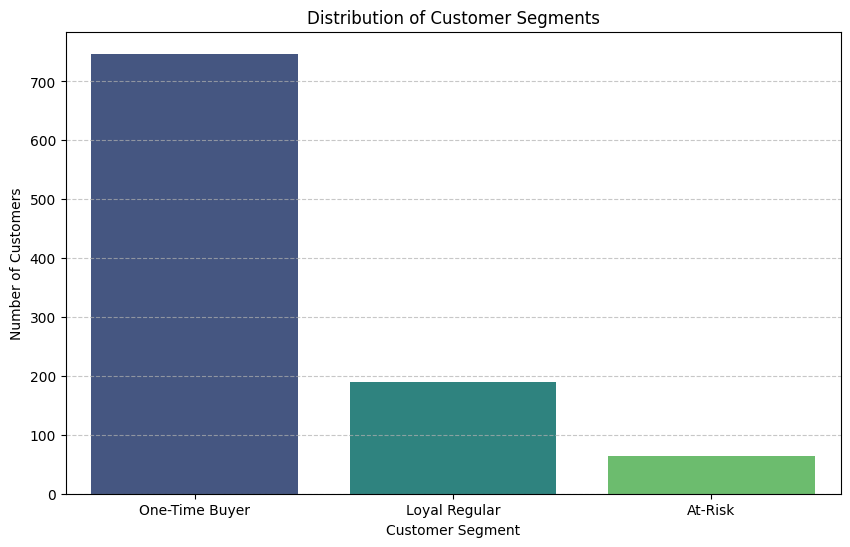

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='customer_segment', data=df, palette='viridis', order=df['customer_segment'].value_counts().index)
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **From the bar chart showing the distribution of customer segments, we can observe the following:**

**One-Time Buyers represent the largest segment**, indicating a significant portion of the customer base falls into the category with a churn probability between 0.40 and 0.70. This segment likely needs **strategies to encourage repeat purchases and improve engagement**.

**Loyal Regulars** form the second-largest group, which is good. These are customers with a churn probability between 0.10 and 0.40, suggesting they are relatively stable but still benefit from loyalty programs and exclusive offers.

**At-Risk Customers** are the smallest segment, characterized by a high churn probability (above 0.70). These customers require immediate attention with win-back campaigns and targeted interventions to prevent churn.

There appears to be **no 'VIP' segment** in this distribution. This means that, based on the defined conditions (churn probability <= 0.10), no customers currently qualify as VIPs. This might indicate that the **customer base generally has a higher churn probability**.


# ✅ **What is Lifetime Value?**

**Lifetime Value (LTV)** — often called Customer Lifetime Value (CLV) — is a core metric in analytics and CRM. It estimates how much revenue (or profit) a customer will generate over their entire relationship with the business.

Definition

**Lifetime Value =
(Average Order Value) × (Purchase Frequency) × (Expected Customer Lifespan)**

Where:

**Purchase Frequency**

Estimated as:
**orders per month = order_count / (recency_days / 30)**

**Expected Lifespan**

We approximated survival time using churn probability:

**Expected Lifespan (months) = 1 / churn_probability**

**Or in profit-focused models:**

**Lifetime Value =
(Customer Revenue × Gross Margin %) − Acquisition Cost**

# 🔎 **What LTV Measures**

It answers:

*   How valuable is this customer to the business long-term?
*   How much can we spend to acquire/retain them?

# **Which segment is worth investing in?**

💡 **Interpretation**

*   **Elite LTV (top 20% of customers):**	VIPs and brand advocates
*   **High LTV (Next 40%):**	Loyal customers with strong retention
*   **Medium LTV (Next 30):**	Regular but low-value shoppers  
*   **Low LTV (bottom 10% of customers):**	One-time shoppers, high churn, low spend

📈 **Example**

Say a customer:

Buys **5 orders per year**

Average order value = **$40**

Expected lifetime = **3 years**

Then: **LTV = 5 × 40 × 3 = $600**

**If margin is 50%, true value = $300 profit.**

The Expected Customer Lifespan is “how long the average customer stays active before churning.”

**You can estimate it in 3 realistic ways, depending on your data maturity.**

**Method 1 — Based on Churn Probability (most common)**

If a customer has an annual churn probability 𝑝

**Expected Lifespan = 1/p**

**Example**

**If monthly churn probability = 0.20
→ expected lifespan ≈ 1 / 0.20 = 5 months**

This approach is used in subscription analytics and retention modeling.

**Method 2 — Based on Recency-Frequency Patterns (Pareto/NBD model)**

If you track:

recency (days since last purchase)

frequency (past orders)

You can use customer buy behavior to estimate how long they’ll keep buying.
Models include:

BG/NBD

Pareto/NBD

These require more statistical modeling but give highly accurate lifetime predictions.

**Method 3 — Simple Historical Average (fast and practical)**

You compute how long past customers stayed active and use that as the average.

**Steps:**

1. Calculate the first purchase date and last purchase date for your historical customers.List item
2. LTake the difference in months/days.ist item
3. Compute the average across all customers.

**Expected Lifespan=Average Time From First to Last Purchase**

This is often 12–36 months in typical ecommerce.

We'll use Method 1 for this project.

In [ ]:
# Calculate Expected Lifespan (Method 1: Based on Churn Probability)
df['expected_lifespan_months'] = 1 / df['churn_probability']

# Calculate Lifetime Value (LTV)
df['ltv'] = df['avg_order_value'] * df['purchase_frequency'] * df['expected_lifespan_months']

# Display the first few rows with the new LTV column
display(df.head())

,customer_id,order_count,avg_order_value,total_spend,discount_ratio,recency_days,purchase_frequency,margin_pct,membership,complaints,rfm_score,churn_probability,customer_segment,expected_lifespan_months,ltv
0,1,5,85.79,428.95,0.096237,342,0.439,0.13,0,0,7,0.6886,One-Time Buyer,1.452222,54.693305
1,2,4,66.90,267.60,0.391311,56,2.143,0.52,0,1,9,0.4556,One-Time Buyer,2.194908,314.676690
2,3,4,8.94,35.76,0.475590,59,2.034,0.37,0,1,8,0.5022,One-Time Buyer,1.991239,36.208602
3,4,5,307.57,1537.85,0.326991,220,0.682,0.53,0,0,11,0.5043,One-Time Buyer,1.982947,415.948324
4,5,5,85.60,428.00,0.302156,185,0.811,0.48,0,0,9,0.4985,One-Time Buyer,2.006018,139.260983


In [29]:
p10 = df['ltv'].quantile(0.10)
p40 = df['ltv'].quantile(0.40)
p80 = df['ltv'].quantile(0.80)

bins = [df['ltv'].min(), p10, p40, p80, df['ltv'].max()]
labels = ['Low', 'Medium', 'High', 'Elite']

df['ltv_tier'] = pd.cut(df['ltv'], bins=bins, labels=labels, include_lowest=True)

print("LTV Tier Distribution:")
print(df['ltv_tier'].value_counts())

print("\nDataFrame with new 'ltv_tier' column:")
display(df.head())

LTV Tier Distribution:
ltv_tier
High      400
Medium    300
Elite     200
Low       100
Name: count, dtype: int64

DataFrame with new 'ltv_tier' column:


,customer_id,order_count,avg_order_value,total_spend,discount_ratio,recency_days,purchase_frequency,margin_pct,membership,complaints,rfm_score,churn_probability,customer_segment,expected_lifespan_months,ltv,ltv_tier
0,1,5,85.79,428.95,0.096237,342,0.439,0.13,0,0,7,0.6886,One-Time Buyer,1.452222,54.693305,Medium
1,2,4,66.90,267.60,0.391311,56,2.143,0.52,0,1,9,0.4556,One-Time Buyer,2.194908,314.676690,High
2,3,4,8.94,35.76,0.475590,59,2.034,0.37,0,1,8,0.5022,One-Time Buyer,1.991239,36.208602,Medium
3,4,5,307.57,1537.85,0.326991,220,0.682,0.53,0,0,11,0.5043,One-Time Buyer,1.982947,415.948324,High
4,5,5,85.60,428.00,0.302156,185,0.811,0.48,0,0,9,0.4985,One-Time Buyer,2.006018,139.260983,High


# **Distribution of customer LTV Tiers**

/tmp/ipython-input-4114442243.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ltv_tier', data=df, palette='viridis', order=df['ltv_tier'].value_counts().index)


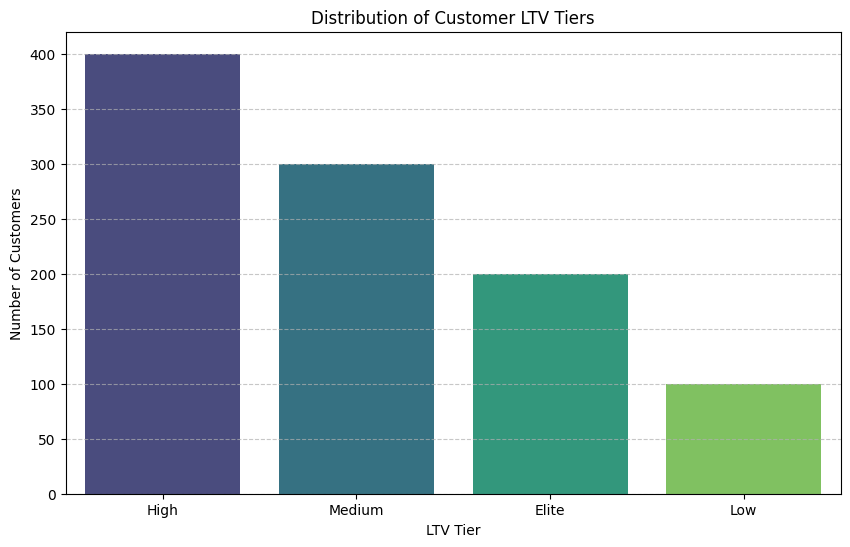

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='ltv_tier', data=df, palette='viridis', order=df['ltv_tier'].value_counts().index)
plt.title('Distribution of Customer LTV Tiers')
plt.xlabel('LTV Tier')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()